In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set preferred plotting style
sns.set(style='white')

# I. Exploratory Data Analysis (EDA)
In this section we do an exploratory analysis of the housing price dataset to get a sense of what the data looks like, how it is distributed, and to identify any issues (e.g. missing data). EDA can also help with feature engineering for the model.

In [3]:
# read in data, saved to local Downloads folder
df = pd.read_csv('~/Downloads/mc_house_price_data.csv')

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,agency_rating,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1240,5560,1.0,0,7,0,...,1240,0,1955,0,98178,47.5112,-122.257,1380,5610,223900
1,6414100192,12/9/14,3,2.25,2510,7212,2.0,0,7,0,...,2110,400,1951,1991,98125,47.7210,-122.319,1680,7629,541000
2,5631500400,2/25/15,2,1.00,720,10090,1.0,0,6,0,...,720,0,1933,0,98028,47.7379,-122.233,2780,8142,176000
3,2487200875,12/9/14,4,3.00,1980,5000,1.0,0,7,0,...,1070,910,1965,0,98136,47.5208,-122.393,1320,4990,603000
4,1954400510,2/18/15,3,2.00,1740,8060,1.0,0,8,0,...,1740,0,1987,0,98074,47.6168,-122.045,1840,7433,510000


In [5]:
# look at some basic info - data dimensions, column types, number of nulls
print('Data dimensions: ', df.shape)
print(df.info())
print('Total nulls: ', df.isnull().sum())

Data dimensions:  (21613, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   agency_rating  21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  county_grade   21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613

In [6]:
# data summary
print(df.describe())

                 id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   4.580302e+09      3.370842      2.114757   2080.084810  1.510708e+04   
std    2.876566e+09      0.930062      0.770163    920.280727  4.141929e+04   
min    1.000102e+06      0.000000      0.000000    310.000000  5.320000e+02   
25%    2.123049e+09      3.000000      1.750000   1420.000000  5.062000e+03   
50%    3.904930e+09      3.000000      2.250000   1920.000000  7.610000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068900e+04   
max    9.900000e+09     33.000000      8.000000  13500.000000  1.651329e+06   

             floors    waterfront  agency_rating          view     condition  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542       7.656873      0.234303      3.409430   
std        0.539989      0.086517       1.175459

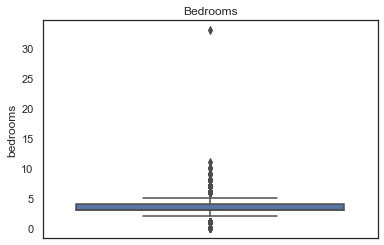

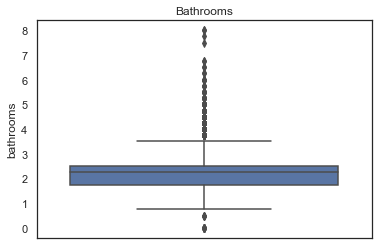

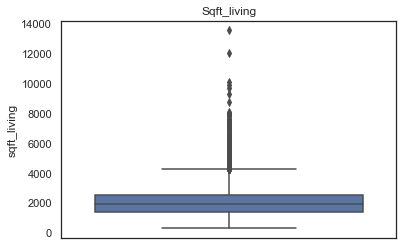

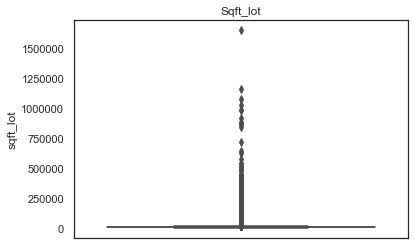

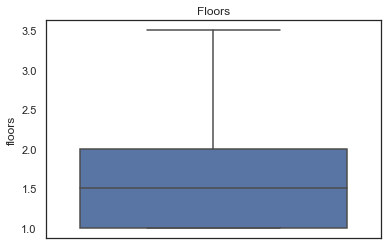

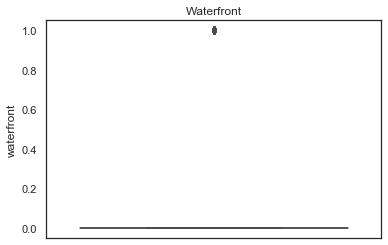

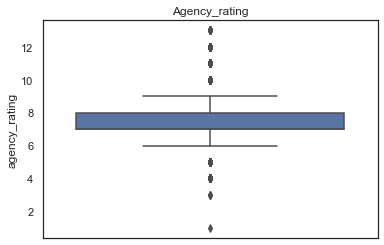

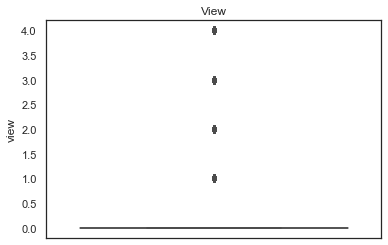

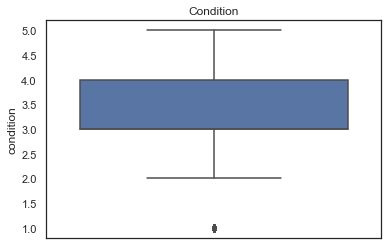

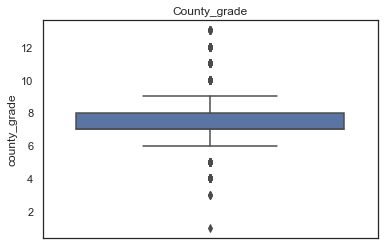

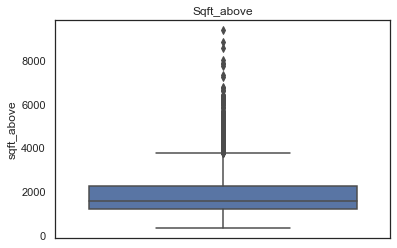

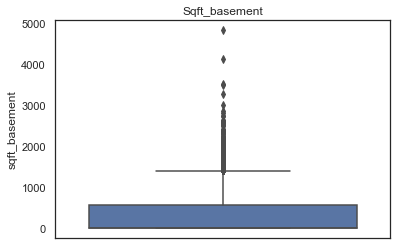

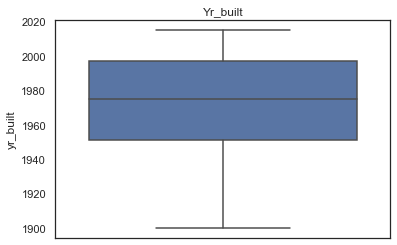

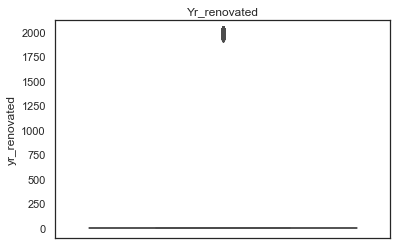

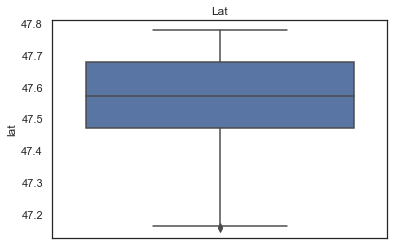

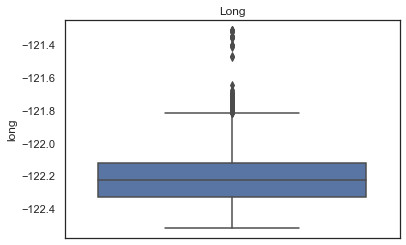

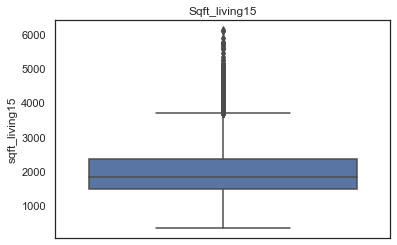

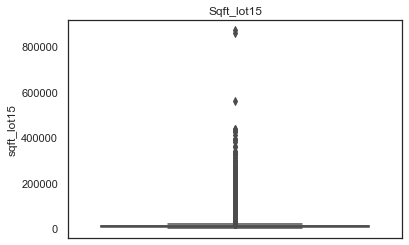

In [7]:
# Look at numerical data for any outliers
# Zip code is dropped because it's really a categorical; it's numerical values are not really meaningful
df_nums = df.drop(columns=['id', 'date', 'zipcode', 'price'])
cols = df_nums.columns.tolist()

for col in cols:
    sns.boxplot(data=df, y=col)
    plt.title(f'{col.capitalize()}')
    plt.show()

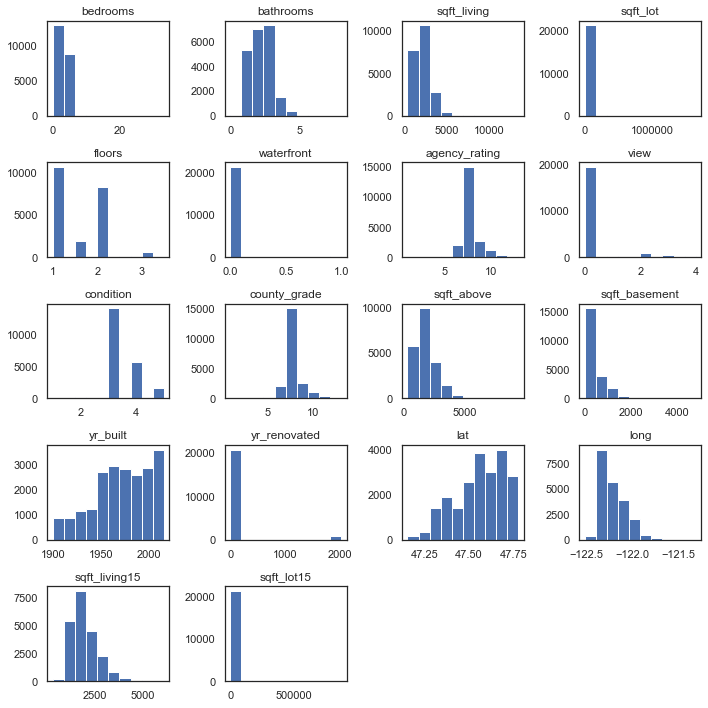

In [8]:
# Plot a grid of histograms
# It's a little easier to see all of the data together this way

fig = plt.figure(figsize=(10,10))
index = 1
for col in cols:
    ax = fig.add_subplot(5, 4, index)
    plt.hist(df_nums[col])
    plt.title(col, fontsize=12)
    index += 1
plt.tight_layout()

### Feature engineering
Do a bit deeper analysis to select features, identify interaction terms, and handle categorical data

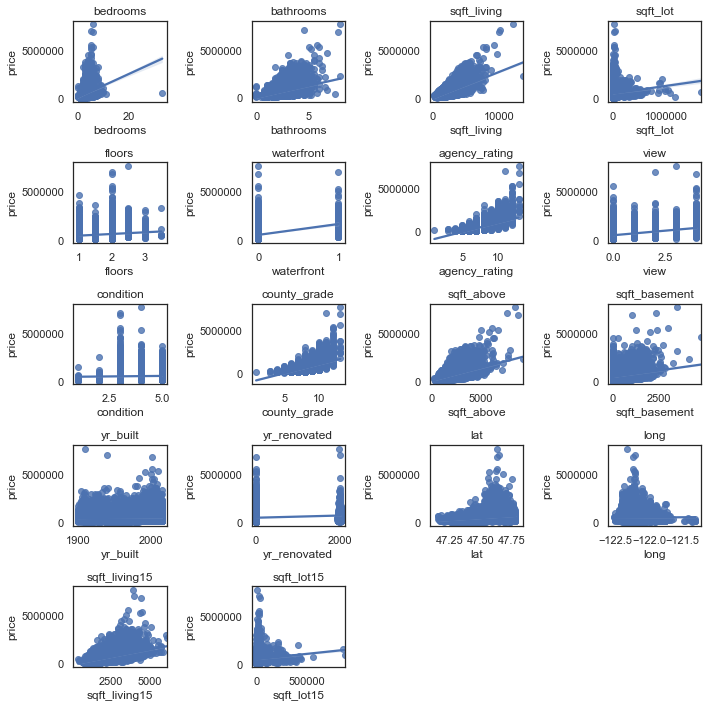

In [54]:
# simple linear regression AKA regplot

fig = plt.figure(figsize=(10,10))
index = 1
for col in cols:
    ax = fig.add_subplot(5, 4, index)
    sns.regplot(x=df[col], y=df['price'])
    plt.title(col, fontsize=12)
    index += 1
plt.tight_layout()

In [20]:
# create feature interactions
df_nums['bedrooms*floors'] = df_nums['bedrooms'] * df_nums['floors']
df_nums['sqft_lot*floors'] = df_nums['sqft_lot'] * df_nums['floors']
df_nums['agency_rating*yr_renovated'] = df_nums['agency_rating'] * df_nums['yr_renovated']
df_nums['yr_built*yr_renovated'] = df_nums['yr_built'] * df_nums['yr_renovated']

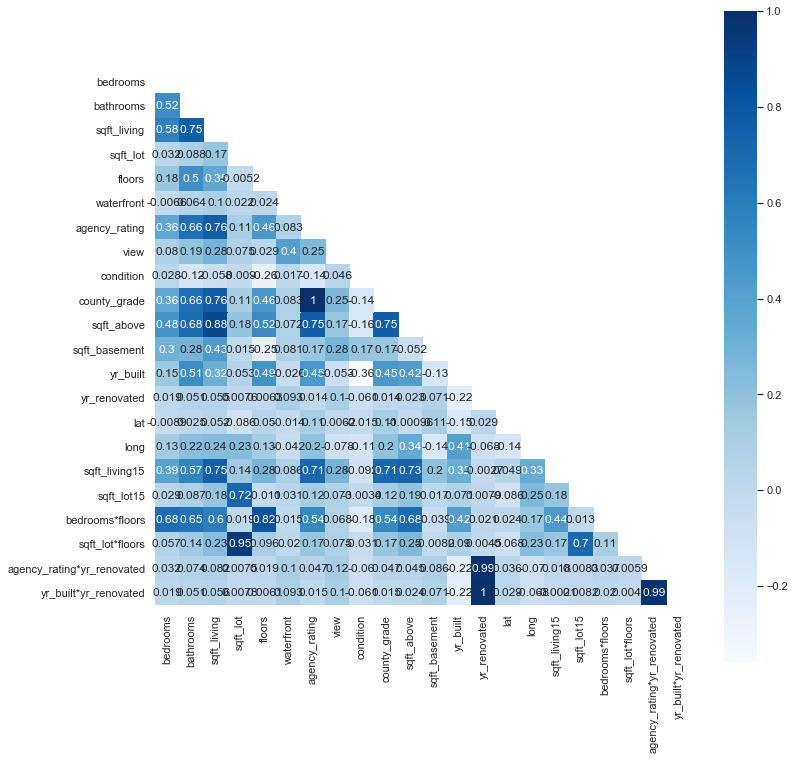

In [21]:
# look for highly correlated variables
corr = df_nums.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='Blues')

In [22]:
# drop highly correlated features from the final dataset
corr_matrix = df_nums.corr().abs()  # slightly different from corr above
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_nums_new = df_nums.drop(to_drop, axis=1)

In [23]:
df_nums_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,agency_rating,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bedrooms*floors,sqft_lot*floors
0,3,1.00,1240,5560,1.0,0,7,0,3,1240,0,1955,0,47.5112,-122.257,1380,5610,3.0,5560.0
1,3,2.25,2510,7212,2.0,0,7,0,3,2110,400,1951,1991,47.7210,-122.319,1680,7629,6.0,14424.0
2,2,1.00,720,10090,1.0,0,6,0,3,720,0,1933,0,47.7379,-122.233,2780,8142,2.0,10090.0
3,4,3.00,1980,5000,1.0,0,7,0,5,1070,910,1965,0,47.5208,-122.393,1320,4990,4.0,5000.0
4,3,2.00,1740,8060,1.0,0,8,0,3,1740,0,1987,0,47.6168,-122.045,1840,7433,3.0,8060.0


In [24]:
# deal with zip codes

# how many unique zip codes?
df['zipcode'].nunique()

70

In [25]:
# zip code probably has an effect on the price of the house
# if more time was spent on this, would probably do a hierarchical linear model with zip code as a random effect
zips = pd.get_dummies(df['zipcode'])
print(zips.shape)

(21613, 70)


# II. Modeling

In [27]:
# could spend a lot of time engineering features and analyzing data
# but let's go ahead an start building our model

from sklearn.pipeline import Pipeline # pipeline to prevent data leakage
from sklearn.preprocessing import StandardScaler # center data for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# create the final training data set X and target y
y = df['price']
X = pd.merge(df_nums, zips, how='inner', left_index=True, right_index=True)

# ensure no indexing issues
assert X.shape[0] == y.shape[0]

In [28]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# create pipelines to make post-split preprocessing easier
# pipelines help prevent data leakage
# we will look at 3 different linear regression strategies, so make 3 pipelines
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
lasso_pipeline = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])

In [30]:
# fit the models on the training data
lr_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

/Users/alysonweidmann/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169116752396914.0, tolerance: 202326510491.3407
  positive)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [31]:
# run predictions on the test data so we can evaluate performance and compare models
lr_ypred = lr_pipeline.predict(X_test)
ridge_ypred = ridge_pipeline.predict(X_test)
lasso_ypred = lasso_pipeline.predict(X_test)

# III. Evaluation

In [64]:
from sklearn import metrics

def evaluate(model, y_pred, y_test):
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    intercept = model.intercept_

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('intercept', round(intercept, 2))

def covariate_importance(model, X):
    for i in np.abs(model.coef_).argsort()[::-1][:5]:
        print(X.columns[i], np.abs(model.coef_[i]))

In [58]:
# multiple linear regression results
evaluate(lr_pipeline['lr'], lr_ypred, y_test)

explained_variance:  0.8071
r2:  0.8071
MAE:  94772.8467
MSE:  26501822060.1507
RMSE:  162793.8023
intercept 540457.73


In [59]:
# Ridge regression results
evaluate(ridge_pipeline['ridge'], ridge_ypred, y_test)

explained_variance:  0.8071
r2:  0.8071
MAE:  94678.9032
MSE:  26496980209.235
RMSE:  162778.9305
intercept 540565.8


In [60]:
# Lasso regression results
evaluate(lasso_pipeline['lasso'], lasso_ypred, y_test)

explained_variance:  0.8071
r2:  0.8071
MAE:  94683.1194
MSE:  26501864425.138
RMSE:  162793.9324
intercept 540565.8


All three models perform more or less the same. We get a slight improvement in the MAE and the MSE/RMSE for Ridge regression, most likely because Ridge can help reduce overfitting during training.

In [69]:
# How do we interpret the model results?
# Look at the top features and their coefficients for their modeled effect on housing price
print('OLS Multiple Regression: ')
covariate_importance(lr_pipeline['lr'], X_train)
print('\n')

print('Ridge Regression: ')
covariate_importance(ridge_pipeline['ridge'], X_train)
print('\n')

print('Lasso Regression: ')
covariate_importance(lasso_pipeline['lasso'], X_train)

OLS Multiple Regression: 
sqft_living 4.660089297542374e+17
sqft_above 4.199695651685419e+17
sqft_basement 2.2316586395512784e+17
agency_rating 1.6809788802615392e+17
county_grade 1.6809788802608486e+17


Ridge Regression: 
agency_rating*yr_renovated 141052.20271065173
yr_renovated 100102.00864947063
sqft_living 83823.01438572518
sqft_above 83345.35464605493
bedrooms*floors 76214.56615067637


Lasso Regression: 
sqft_living 207889.08810726236
agency_rating*yr_renovated 143208.94810398293
yr_built*yr_renovated 124343.2565594372
bedrooms*floors 76441.530348693
agency_rating 75028.24479439345


# IV. Interpretation

* The baseline housing price (model intercept) is approximately $540.5K.

* The best-performing model, Ridge regression, finds that every 1-sq foot increase in the main living area increases the price by approximately $80k.

* Agency rating and the year of renovation are also important predictors of housing price -- every increase in year renovated (i.e., a more recent renovation) increases the predicted price by about $100k.

There are many factors not explored in this model due to time constraints. More interesting options would be to more deeply explore the feature interactions and how they reinforce or offset one another. This could be visualized with Shapley plots or even simple bivariate scatter plots. More time could also have been spent engineering new features; for example instead of using the year renovated, we could calculate the time since renovation to scale the features a little better. 

Additionally, more could be done to explore the effects of zip code. Because all of these houses are in the same metro area, different zip codes could contain interesting latent effects reflected in housing prices -- socioeconomic status of residents, tax revenue, and school district rating are all latent variables that could vary by zip code and also greatly affect housing prices. A more interesting approach would be to construct a hierarchical linear model with zip code as a random effect. To check whether this would be a good approach, I would plot the residuals from the OLS models and check for violation of OLS assumptions (e.g. heteroskedacisticity), which would indicate latent effects on the variance.

Finally, a more sophisticated set of models could be explored. I used OLS as the simplest approach for modeling a continuous outcome (housing price), with a few modifiers (Lasso and Ridge, AKA L1 and L2 Regularization, respectively. Least squares models have some limitations, however; if the data violate the underlying OLS assumptions (conditional mean of zero, errors are normally distributed, errors are homoskedastic and not auto-correlated), then the OLS model fails to describe the underlying data and performance will decrease. Advanced machine learning regressors, such as XGBoostRegressor, RandomForestRegressor, or SVM regression may be more robust to data that violates these assumptions.